In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import sklearn.datasets


In [119]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [120]:
house_price_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [121]:
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)


In [122]:
house_price_dataframe['price'] = house_price_dataset.target

In [123]:
temp_df = house_price_dataframe.copy()

In [124]:
temp_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [125]:
temp_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [126]:
temp_df.duplicated().sum()

0

In [127]:
temp_df.describe(include='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### PLOTTING BOX PLOT TO DETECT OUTLIERS 

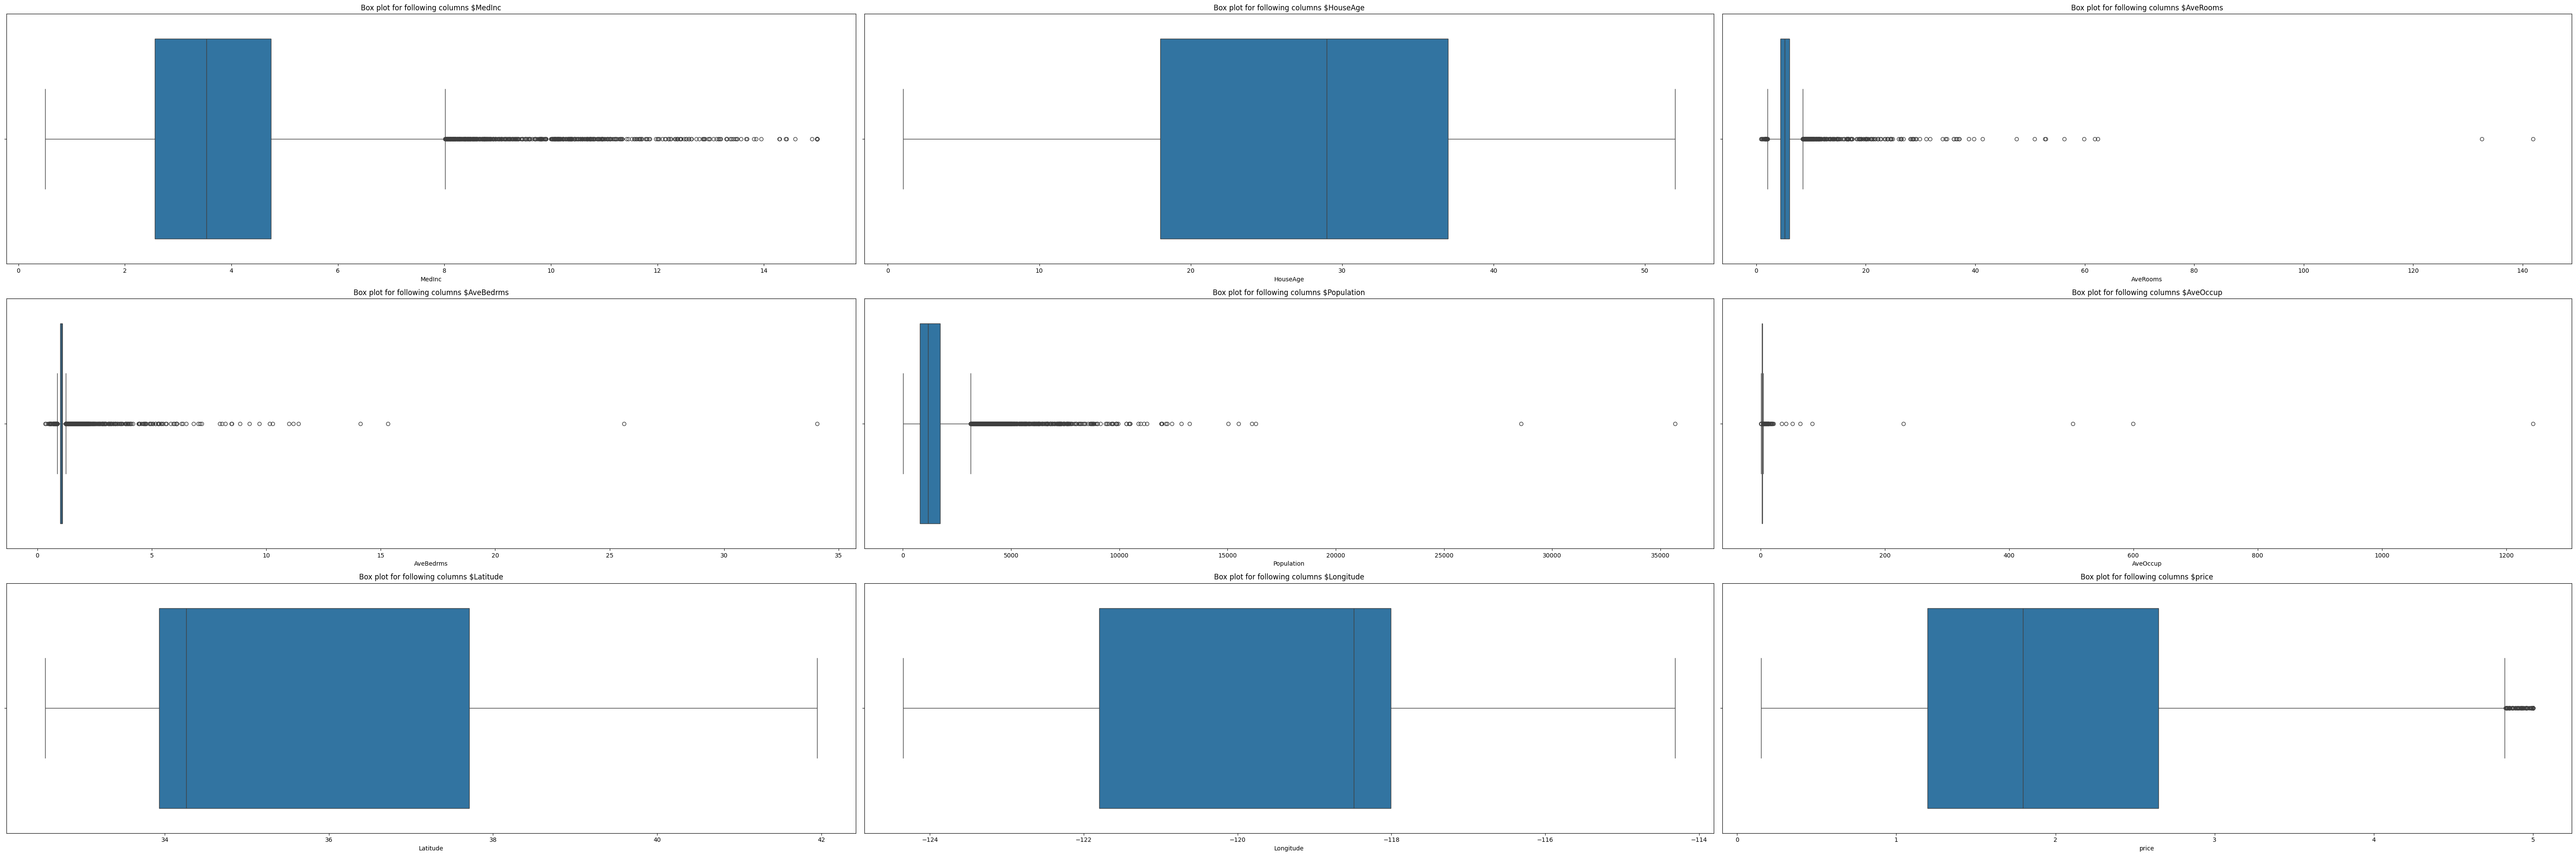

In [128]:
plt.figure(figsize=(60,20))
for i,column in enumerate(temp_df.iloc[:8],1):
    plt.subplot(3,3,i)
    sns.boxplot(x=temp_df[column])
    plt.title(f"Box plot for following columns ${column}")
plt.tight_layout()
plt.show()

In [129]:
temp_df = temp_df[temp_df["MedInc"] < 8]

In [130]:
temp_df.shape

(19949, 9)

In [131]:
### for population , lets remove outside 10000 ! 
temp_df = temp_df[temp_df["Population"] <= 10000]

In [132]:
temp_df.shape

(19928, 9)

In [133]:
temp_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,19928.000000,19928.000000,19928.000000,19928.000000,19928.000000,19928.000000,19928.000000,19928.000000,19928.000000
mean,3.654308,28.686873,5.348132,1.098664,1418.278854,3.011495,35.643988,-119.568054,1.980780
std,1.485351,12.526005,2.466626,0.481202,1036.022254,5.867802,2.145192,2.005027,1.063717
min,0.499900,1.000000,0.846154,0.375000,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.536300,18.000000,4.410628,1.006885,792.000000,2.424136,33.930000,-121.780000,1.175000
50%,3.465100,29.000000,5.175778,1.049734,1171.000000,2.816583,34.260000,-118.500000,1.750000
75%,4.590075,37.000000,5.955710,1.100467,1729.000000,3.288842,37.720000,-118.010000,2.532000
max,7.997700,52.000000,141.909091,34.066667,9936.000000,599.714286,41.950000,-114.310000,5.000010


In [134]:
co_relation_of_df = temp_df.corr()

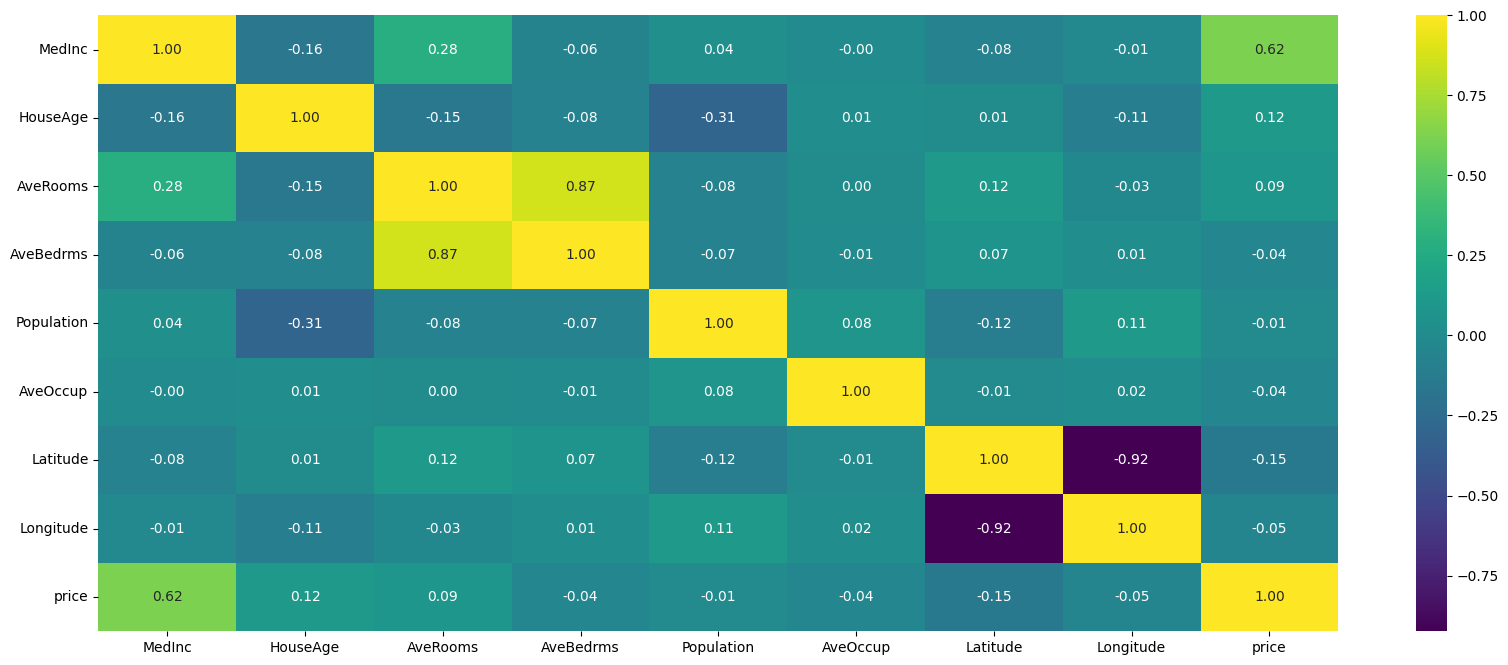

In [135]:
plt.figure(figsize=(20,8))
sns.heatmap(co_relation_of_df,cmap='viridis',annot=True,fmt='.2f')
plt.show()

In [149]:
x = temp_df.iloc[:,:8]
y = temp_df["price"]

In [153]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [154]:
x_train.shape

(15942, 8)

In [155]:
x_test.shape

(3986, 8)

In [160]:
model = XGBRegressor()

In [161]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [171]:
trained_datas = model.predict(x_train)

In [173]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2946,1.6632,27.0,4.864458,1.069277,1380.0,4.156627,35.35,-118.99
15620,4.4712,52.0,4.490909,1.030303,277.0,1.678788,37.80,-122.42
10831,5.2732,15.0,4.811456,1.057279,1015.0,2.422434,33.65,-117.94
1062,3.5046,18.0,5.634812,1.054608,856.0,2.921502,39.75,-121.86
5646,2.7031,37.0,4.628070,1.024561,766.0,2.687719,33.75,-118.29
...,...,...,...,...,...,...,...,...
11743,6.0000,10.0,6.449871,1.084833,1037.0,2.665810,38.85,-121.08
12431,2.1287,13.0,3.875566,1.158371,1978.0,4.475113,33.53,-116.17
5580,3.5473,33.0,4.108926,0.998487,1807.0,2.733737,33.83,-118.30
878,4.5687,33.0,4.962547,1.026217,909.0,3.404494,37.55,-122.02


In [176]:
trained_datas

array([0.5183894, 4.702602 , 2.267497 , ..., 2.5085475, 1.9886768,
       1.4247493], dtype=float32)

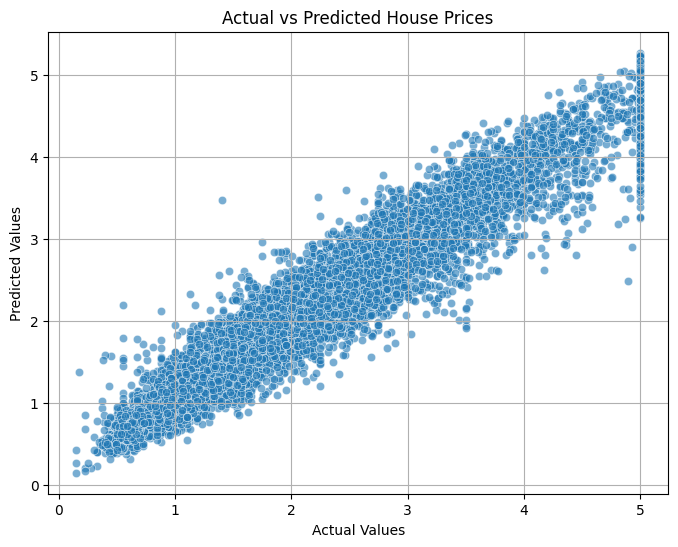

In [180]:
# plt.figure(figsize=(20,10))
# sns.scatterplot(x=trained_datas,y=y_train,alpha=0.2)
# plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=trained_datas, alpha=0.6)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18677,4.9219,7.0,6.090461,1.116776,1375.0,2.261513,36.95,-121.87
13899,1.0568,16.0,7.842767,1.981132,433.0,2.723270,34.52,-116.73
8181,5.6200,36.0,6.228571,1.031746,786.0,2.495238,33.81,-118.10
8659,4.4250,16.0,3.422582,1.111794,2853.0,1.594746,33.85,-118.41
11614,6.4288,26.0,7.075200,0.998400,1936.0,3.097600,33.79,-118.07
...,...,...,...,...,...,...,...,...
4058,3.2813,37.0,4.784946,1.025090,539.0,1.931900,34.15,-118.44
4731,2.7917,49.0,5.128866,0.948454,462.0,2.381443,34.04,-118.36
4252,3.0179,52.0,4.765217,1.073913,423.0,1.839130,34.10,-118.36
2986,1.9417,35.0,4.787440,1.067633,620.0,2.995169,35.33,-119.00


In [181]:
### this was for the training dataset , lets do for testing data set to predict the price .
predicted_dataset = model.predict(x_test)

In [182]:
predicted_dataset

array([2.6040313 , 0.5321675 , 3.3529966 , ..., 3.4300652 , 0.54517585,
       1.3952829 ], dtype=float32)

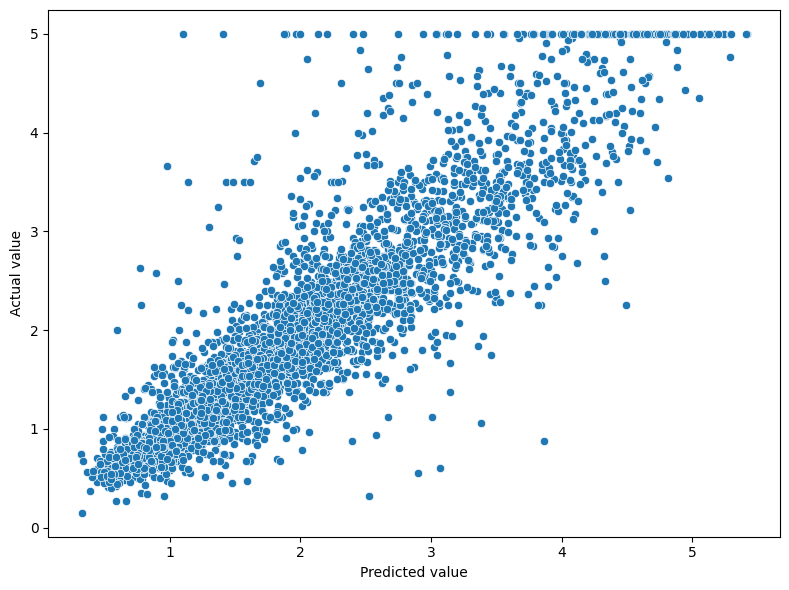

In [188]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=predicted_dataset,y=y_test)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.tight_layout()
plt.show()

In [ ]:
predicted_datase

array([2.6040313 , 0.5321675 , 3.3529966 , ..., 3.4300652 , 0.54517585,
       1.3952829 ], dtype=float32)

In [209]:
mse = mean_squared_error(y_test,predicted_dataset)
mbe = mean_absolute_error(y_test,predicted_dataset)
r2score = r2_score(y_test,predicted_dataset)


In [211]:
mbe,mse,r2score

(0.31252467300101616, 0.23235911536826975, 0.800777502857541)

In [213]:
print("y_test range:", y_test.min(), y_test.max())

y_test range: 0.14999 5.00001


##### plotting the graph between predicted value and actual value 

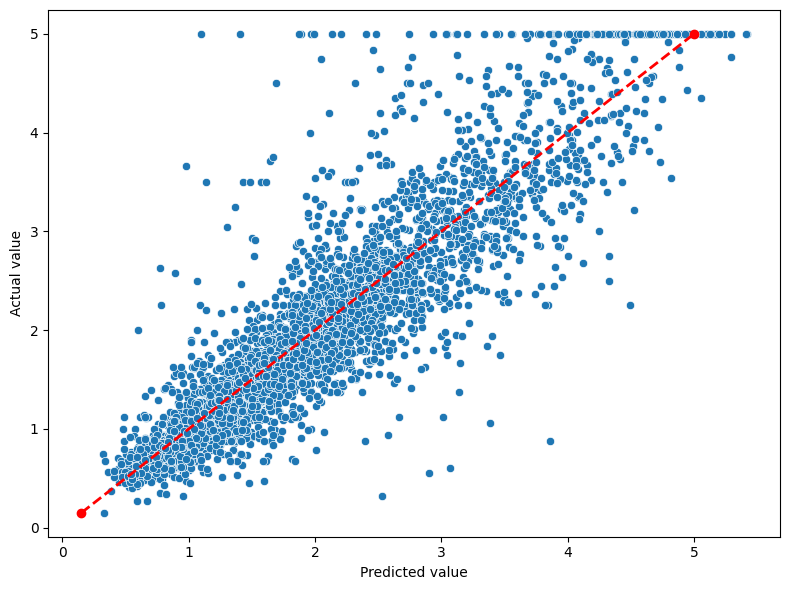

In [216]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=predicted_dataset,y=y_test)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],marker="o",color="red",linestyle="dashed",linewidth=2)
plt.tight_layout()
plt.show()

ValueError: continuous is not supported